In [53]:
import pandas as pd
import numpy as np
from sodapy import Socrata
import os

# Get data using API

In [ ]:
data_location = "data.cityofchicago.org"
client = Socrata(data_location, None)

In [22]:
results = client.get("ijzp-q8t2")

In [54]:
df = pd.DataFrame.from_records(results)
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58
0,12501769,JE397136,2021-10-03T23:50:00.000,047XX S LAKE PARK AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,CHA HALLWAY / STAIRWELL / ELEVATOR,False,True,...,-87.591967028,"{'latitude': '41.809297059', 'longitude': '-87...",1,21192,5,400,10,10,24,113
1,12501782,JE397123,2021-10-03T23:48:00.000,066XX S WOLCOTT AVE,0560,ASSAULT,SIMPLE,STREET,False,True,...,-87.671330274,"{'latitude': '41.773153845', 'longitude': '-87...",44,22257,65,281,3,23,17,205
2,12501773,JE397130,2021-10-03T23:46:00.000,064XX N CLAREMONT AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,RESIDENCE - YARD (FRONT / BACK),False,True,...,-87.688684775,"{'latitude': '41.998574165', 'longitude': '-87...",42,22528,20,320,27,12,11,46
3,12503639,JE398949,2021-10-03T23:45:00.000,001XX W 83RD ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,-87.627702601,"{'latitude': '41.743604251', 'longitude': '-87...",18,21554,40,1,13,59,20,236
4,12501674,JE397128,2021-10-03T23:40:00.000,028XX E 94TH ST,141B,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,STREET,False,False,...,-87.554610052,"{'latitude': '41.724566881', 'longitude': '-87...",47,21202,44,493,47,25,19,238


In [15]:
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', ':@computed_region_awaf_s7ux',
       ':@computed_region_6mkv_f3dw', ':@computed_region_vrxf_vc4k',
       ':@computed_region_bdys_3d7i', ':@computed_region_43wa_7qmu',
       ':@computed_region_rpca_8um6', ':@computed_region_d9mm_jgwp',
       ':@computed_region_d3ds_rm58'],
      dtype='object')

In [21]:
df.domestic.value_counts()

False    1582
True      418
Name: domestic, dtype: int64

# Get data using Zip file (recommended)

In [68]:
from pathlib import Path 

root_dir = Path(os.getcwd()).parent
data_path = os.path.join(root_dir, 'data', 'data.zip')

In the following cell I cam reading in the data from a zip file with a chunksize = 1000000. Because this file is so large, reading the data in chunks will help with possible memory issues

In [69]:
chunk = pd.read_csv(data_path, chunksize=1000000)
data = pd.concat(chunk)

In [70]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7415327 entries, 0 to 7415326
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

## remove null rows

In [74]:
np.count_nonzero(data.isnull())

1608855

In [77]:
1608855 / 7400000

0.21741283783783782

In [75]:
data.dropna(how='any', axis=0, inplace=True)

In [76]:
np.count_nonzero(data.isnull())

0

In [79]:
data.shape

(6728587, 22)

In [87]:
data['Year'].value_counts()

2003    471992
2004    467131
2005    449868
2006    445496
2007    435532
2008    419791
2009    385845
2010    369796
2011    350899
2002    345024
2012    335091
2013    306314
2014    273593
2016    266472
2017    264135
2018    262815
2019    258133
2015    257767
2020    207433
2021    151573
2001      3887
Name: Year, dtype: int64

In [89]:
#year column represents the year of crime
print('Range of year: {} to {}'.format(data.Year.min(), data.Year.max()))

Range of year: 2001 to 2021


In [90]:
# create datetime index
data.index = pd.DatetimeIndex(data.Date)

In [92]:
data.index.month

Int64Index([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
            ...
            10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', name='Date', length=6728587)

In [94]:
import math
#we'll create some new columns like month, dayOfWeek, dayOfMonth, weekOfMonth(wom)
data['Month'] = data.index.month
data['dayOfWeek'] = data.index.dayofweek
data['dayOfMonth'] = data.index.day
data['dayOfYear'] = data.index.dayofyear
data['weekOfMonth'] = data.dayOfMonth.apply(lambda d: (d - 1) // 7 + 1)

dayOfYear = list(data.index.dayofyear)

weekOfYear = [math.ceil(i/7) for i in dayOfYear]
data['weekOfYear'] = weekOfYear

In [95]:
data.shape

(6728587, 28)

In [97]:
data.Arrest.value_counts()

False    4936829
True     1791758
Name: Arrest, dtype: int64

In [114]:
data.Domestic.value_counts()

False    5800181
True      928406
Name: Domestic, dtype: int64

# Exploratory Data Analysis

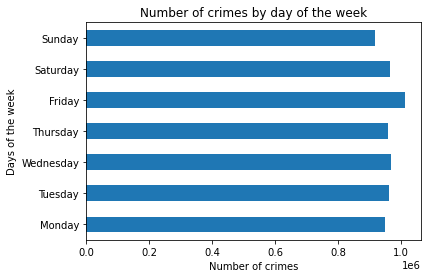

In [102]:
import matplotlib.pyplot as plt


days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data.groupby([data.dayOfWeek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

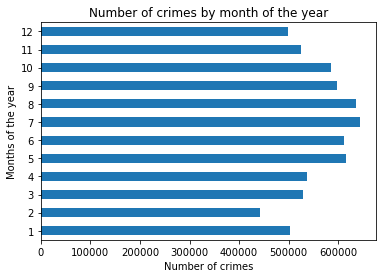

In [103]:
data.groupby([data.Month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

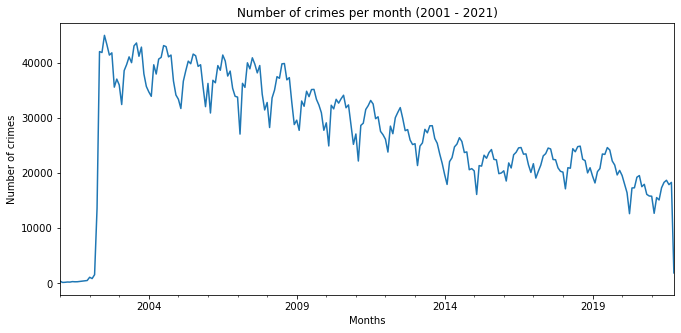

In [113]:
plt.figure(figsize=(11,5))
data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2021)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

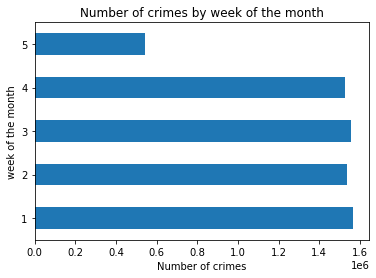

In [105]:

data.groupby([data.weekOfMonth]).size().plot(kind='barh')
plt.ylabel('week of the month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by week of the month')
plt.show()

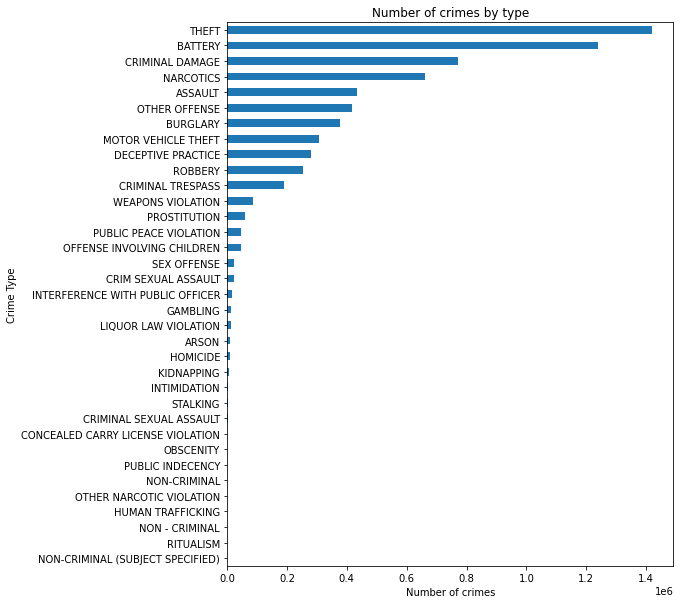

In [106]:

plt.figure(figsize=(8,10))
data.groupby([data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

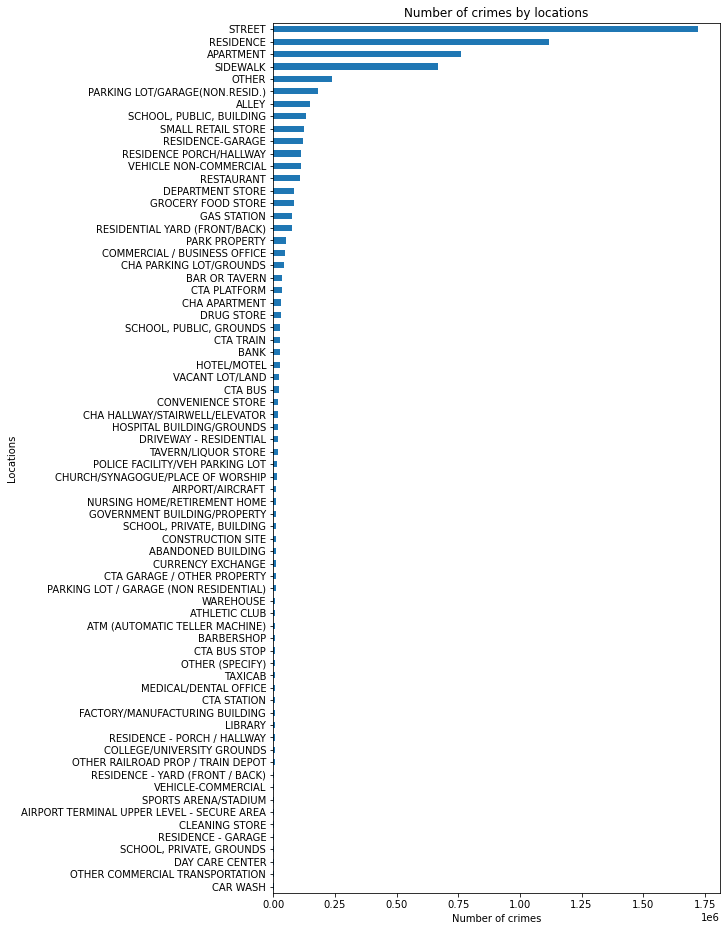

In [110]:

plt.figure(figsize=(8,16))
data.groupby([data['Location Description']]).size().sort_values(ascending=True)[-70:].plot(kind='barh')
plt.title('Number of crimes by locations')
plt.ylabel('Locations')
plt.xlabel('Number of crimes')
plt.show()

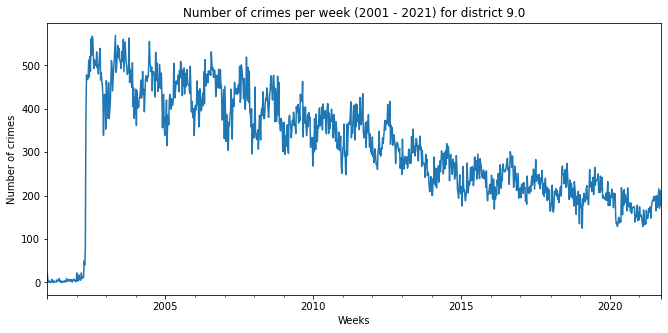

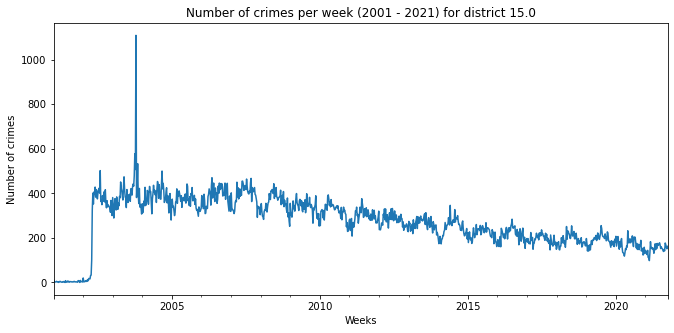

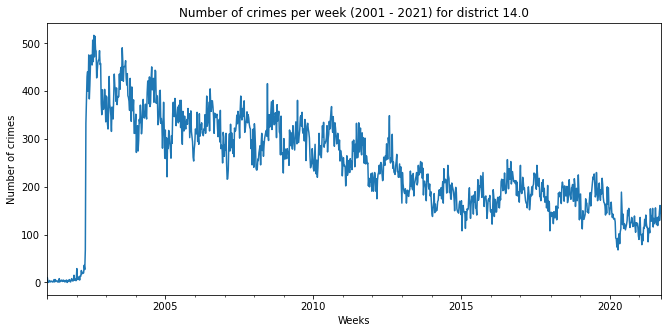

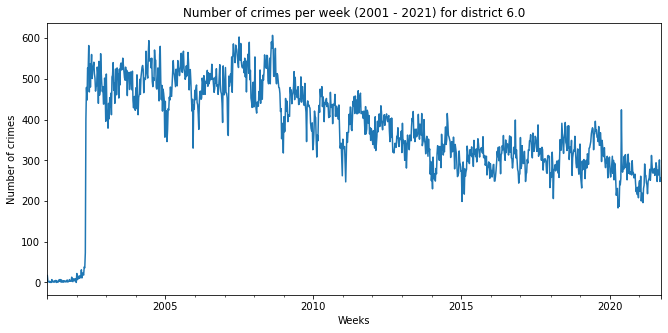

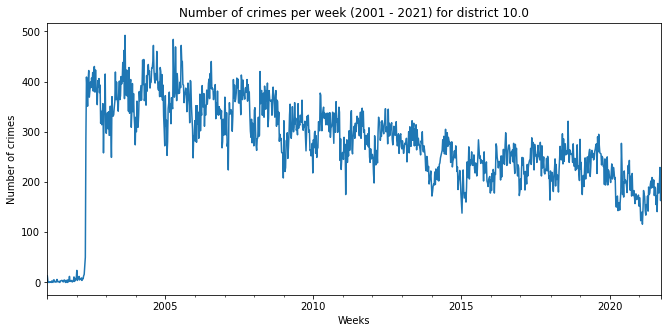

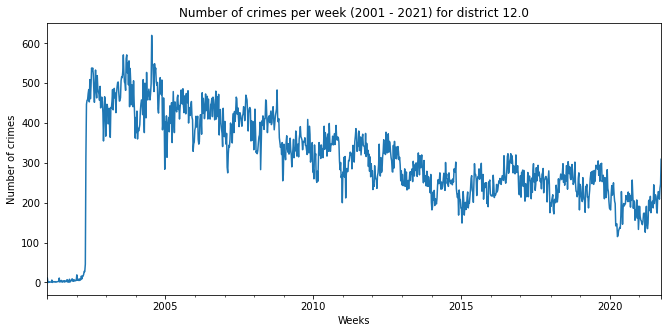

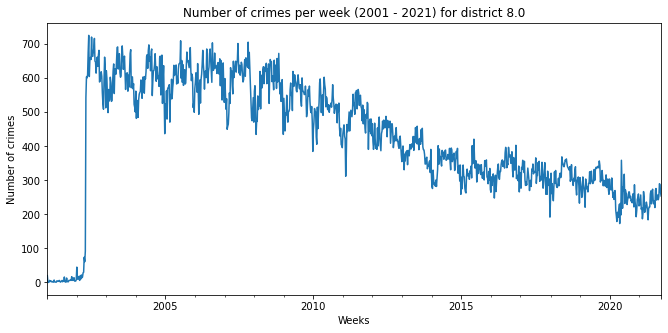

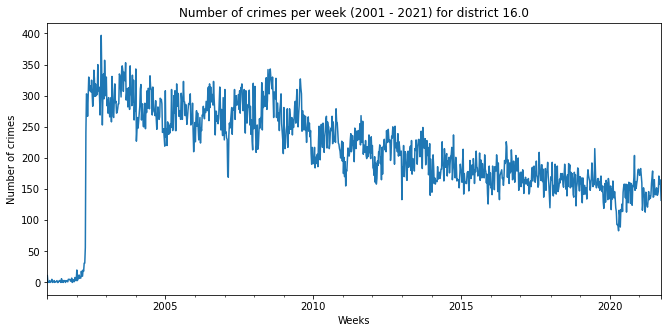

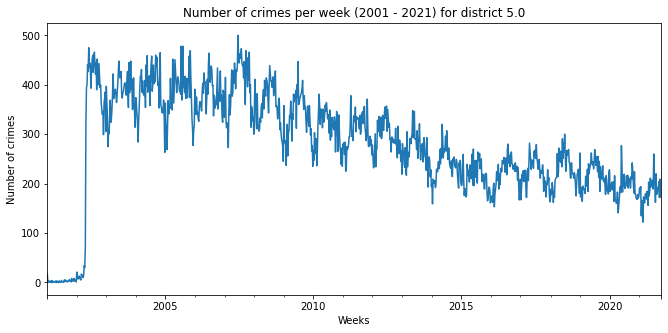

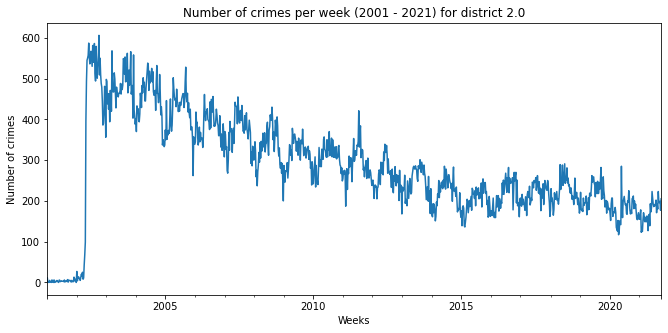

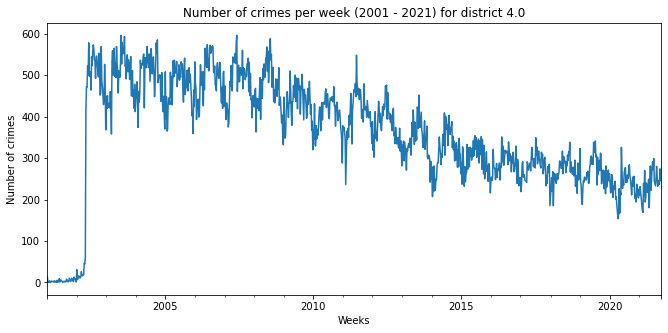

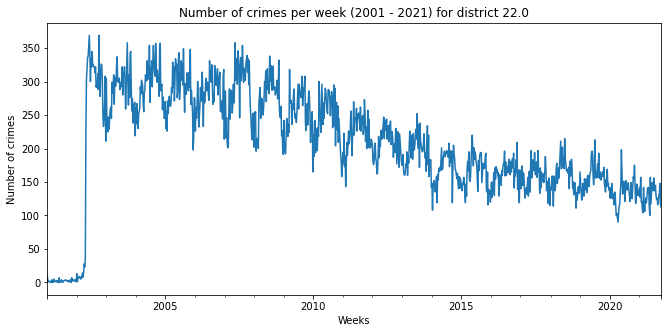

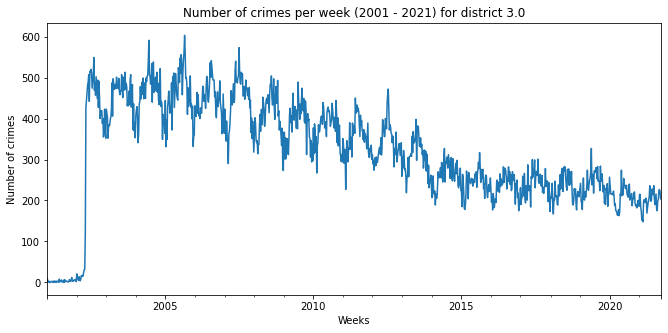

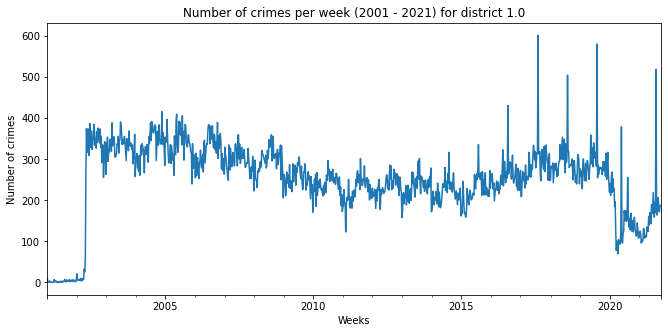

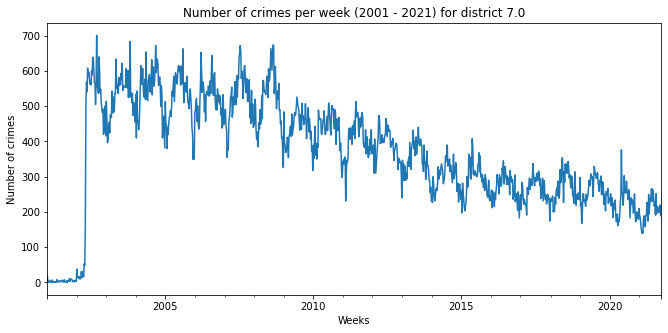

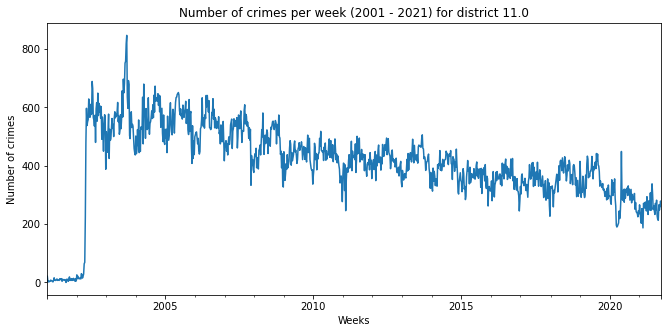

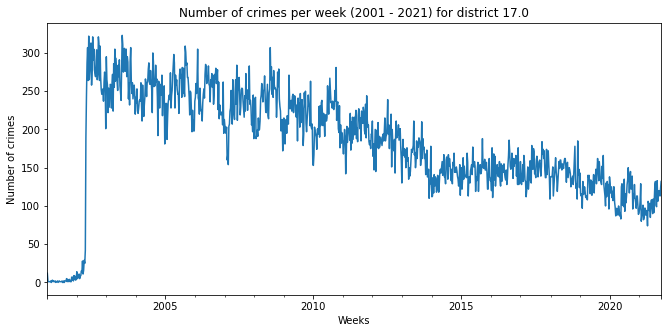

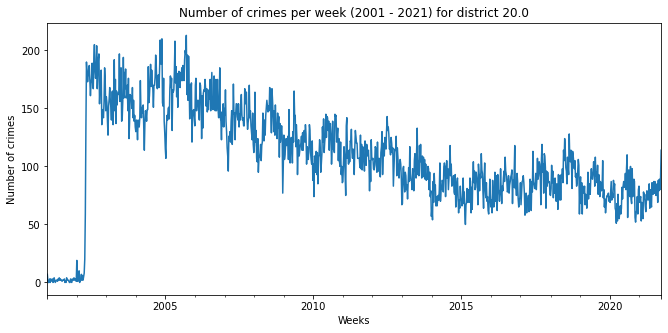

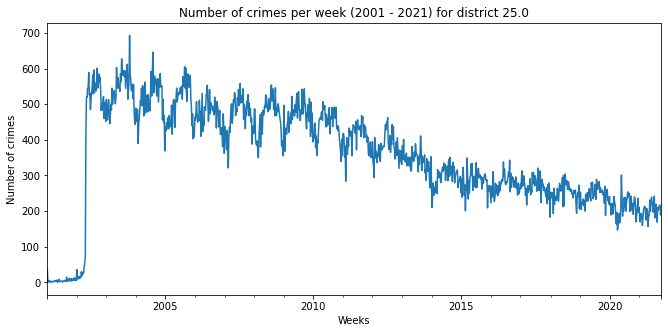

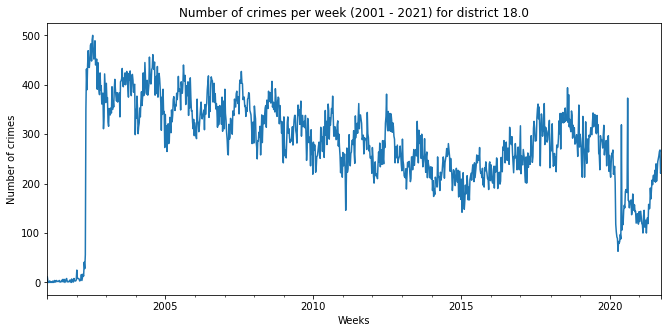

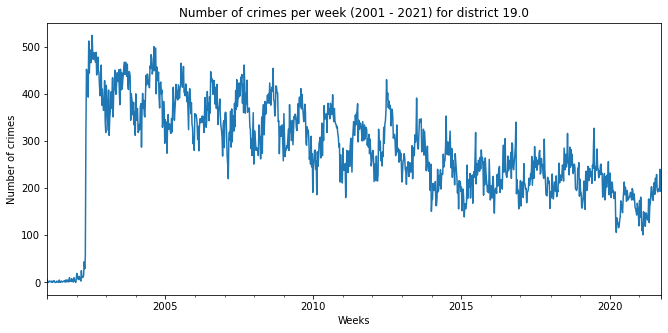

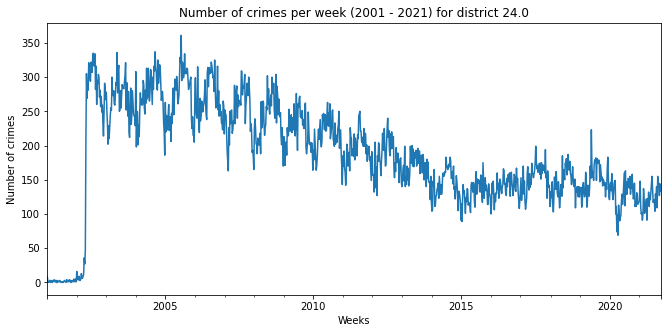

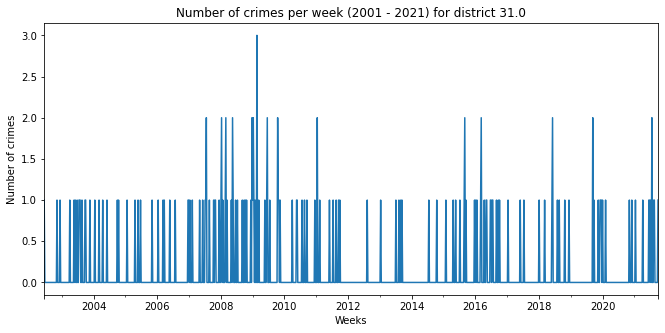

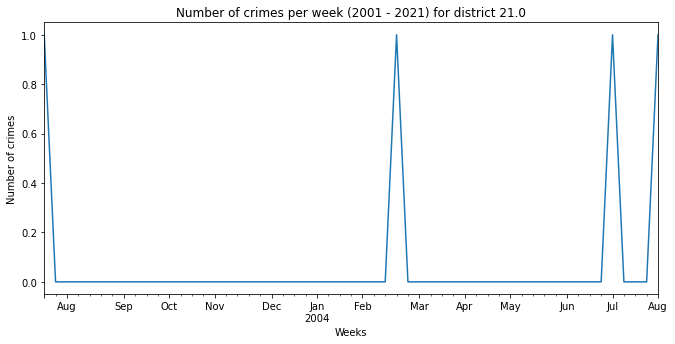

In [112]:
listOfDistricts = list(data['District'].unique())

for district in listOfDistricts:
    df = data[data['District'] == district]
    plt.figure(figsize=(11,5))
    df.resample('W').size().plot(legend=False)
    plt.title('Number of crimes per week (2001 - 2021) for district {}'.format(district))
    plt.xlabel('Weeks')
    plt.ylabel('Number of crimes')
    plt.show()